### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

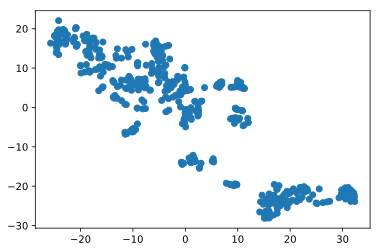

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


%config InlineBackend.figure_format = "svg"
%matplotlib inline


feature_names = load_boston().feature_names
X = pd.DataFrame(load_boston().data, columns=feature_names)
y = load_boston().target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

Для 0-того кластера середняя цена недвижимости: 24.971204188481675, показатель преступности: 0.42098554973821994
Для 1-того кластера середняя цена недвижимости: 16.1796875, показатель преступности: 10.6370940625
Для 2-того кластера середняя цена недвижимости: 27.87411764705882, показатель преступности: 0.0721184705882353


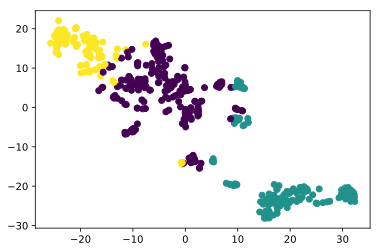

In [57]:
from sklearn.cluster import KMeans

# KMeans?
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
for i in range(3):
    print(f"Для {i}-того кластера середняя цена недвижимости: {y_train[labels_train == i].mean()}, показатель преступности: {X_train.loc[labels_train == i, 'CRIM'].mean()}")
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)